In [1]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib.widgets import Slider, Button, RadioButtons
plt.rcParams['figure.figsize'] = [9,7.2]

import sys
sys.path.append('../code/')
import utils

In [2]:
def load_filters():
    u, g, r, i, z = [np.loadtxt(f'filters/sdss_{f}.txt') for f in ['u', 'g', 'r', 'i', 'z']]
    return u, g, r, i, z

In [47]:
sdss_colors = np.load(f'{utils.base}/data/output/sdss_colors.npy')

surv_ug = sdss_colors[:,0]
surv_gr = sdss_colors[:,1]
surv_ri = sdss_colors[:,2]
surv_iz = sdss_colors[:,3]

mask = (surv_ug > 0.5) & (surv_ug < 3)
surv_ug = surv_ug[mask]
surv_gr = surv_gr[mask]
surv_ri = surv_ri[mask]
surv_iz = surv_iz[mask]

mask = (surv_gr > 0) & (surv_gr < 1.75)
surv_ug = surv_ug[mask]
surv_gr = surv_gr[mask]
surv_ri = surv_ri[mask]
surv_iz = surv_iz[mask]

mask = (surv_ri > -3) & (surv_ri < 3)
surv_ug = surv_ug[mask]
surv_gr = surv_gr[mask]
surv_ri = surv_ri[mask]
surv_iz = surv_iz[mask]

mask = (surv_iz > -3) & (surv_iz < 3)
surv_ug = surv_ug[mask]
surv_gr = surv_gr[mask]
surv_ri = surv_ri[mask]
surv_iz = surv_iz[mask]

In [4]:
df_noneb = pd.read_pickle(f'{utils.base}/data/output/sliders/slider_noneb.pkl')

df_noneb['Halo Mass'] = df_noneb['Halo Mass'].astype(float)
df_noneb['tau_young'] = np.round(df_noneb['tau_young'], 2)
df_noneb['tau_old'] = np.round(df_noneb['tau_old'], 2)
df_noneb['redshift'] = np.round(df_noneb['redshift'], 2)

In [11]:
df_neb = pd.read_pickle(f'{utils.base}/data/output/sliders/slider_neb_nospec.gz', compression="gzip")

df_neb['tau_young'] = np.round(df_neb['tau_young'], 2)
df_neb['tau_old'] = np.round(df_neb['tau_old'], 2)
df_neb['redshift'] = np.round(df_neb['redshift'], 2)
df_neb['log(U)'] = np.round(df_neb['log(U)'], 3)

<IPython.core.display.Javascript object>


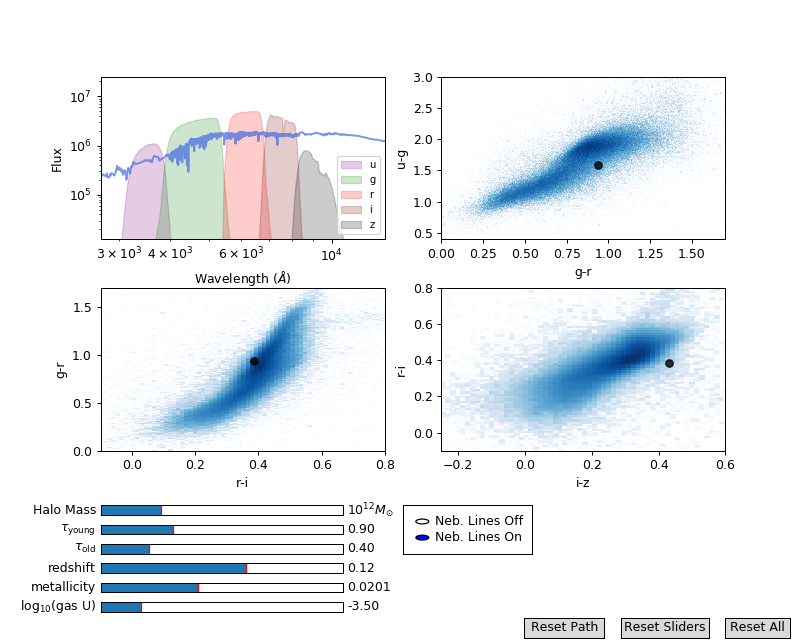

In [68]:

# the actual plotting and sliders
fig, axes = plt.subplots(ncols=2, nrows=2)
# weird formatting here with lists is due to matplotlib dimension compression
[ax, ax1], [ax2, ax3] = axes

u, g, r, i, z = load_filters()
colors = ['purple', 'green', 'red', 'maroon', 'black']
filters = ['u', 'g', 'r', 'i', 'z']

# initial values for sliders and plots
m0 = 12
Z0 = 0.0201
ty0 = 0.9
to0 = 0.4
z0 = 0.12

# plotting SDSS colors in the background
cmap = mpl.cm.Blues
bins = 400
ax1.hist2d(surv_gr, surv_ug, bins=bins, cmap=cmap, norm=mpl.colors.LogNorm())
ax2.hist2d(surv_ri, surv_gr, bins=bins, cmap=cmap, norm=mpl.colors.LogNorm())
ax3.hist2d(surv_iz, surv_ri, bins=bins, cmap=cmap, norm=mpl.colors.LogNorm())

# spec = df_noneb['spec'].loc[(df_noneb['Halo Mass'] == m0) & (df_noneb['tau_young'] == ty0)\
#                             & (df_noneb['tau_old'] == to0) & (df_noneb['redshift'] == z0) & \
#                             (df_noneb['metallicity'] == Z0) & (df_noneb['neb_lines'] == 0)]
# spec = spec.iloc[0]
ug = df_noneb['u-g'].loc[(df_noneb['Halo Mass'] == m0) & (df_noneb['tau_young'] == ty0)\
                            & (df_noneb['tau_old'] == to0) & (df_noneb['redshift'] == z0) & \
                            (df_noneb['metallicity'] == Z0) & (df_noneb['neb_lines'] == 0)]
gr = df_noneb['g-r'].loc[(df_noneb['Halo Mass'] == m0) & (df_noneb['tau_young'] == ty0)\
                            & (df_noneb['tau_old'] == to0) & (df_noneb['redshift'] == z0) & \
                            (df_noneb['metallicity'] == Z0) & (df_noneb['neb_lines'] == 0)]
ri = df_noneb['r-i'].loc[(df_noneb['Halo Mass'] == m0) & (df_noneb['tau_young'] == ty0)\
                            & (df_noneb['tau_old'] == to0) & (df_noneb['redshift'] == z0) & \
                            (df_noneb['metallicity'] == Z0) & (df_noneb['neb_lines'] == 0)]
iz = df_noneb['i-z'].loc[(df_noneb['Halo Mass'] == m0) & (df_noneb['tau_young'] == ty0)\
                            & (df_noneb['tau_old'] == to0) & (df_noneb['redshift'] == z0) & \
                            (df_noneb['metallicity'] == Z0) & (df_noneb['neb_lines'] == 0)]

spec = np.load(f'{utils.base}/data/output/sliders/npy/m{m0:.0f}_Z{Z0:.3f}_tyoung{ty0:.1f}_told{to0:.1f}_neb_off.npy')
wav = np.load(f'{utils.base}/data/output/sliders/wav.npy') * (1 + z0)
# ug = np.load(f'{utils.base}/data/output/sliders/colors/m{m0:.0f}_Z{Z0:.3f}_tyoung{ty0:.1f}_told{to0:.1f}_z{z0}_neb_off_ug.npy')
# gr = np.load(f'{utils.base}/data/output/sliders/colors/m{m0:.0f}_Z{Z0:.3f}_tyoung{ty0:.1f}_told{to0:.1f}_z{z0}_neb_off_gr.npy')
# ri = np.load(f'{utils.base}/data/output/sliders/colors/m{m0:.0f}_Z{Z0:.3f}_tyoung{ty0:.1f}_told{to0:.1f}_z{z0}_neb_off_ri.npy')
# iz = np.load(f'{utils.base}/data/output/sliders/colors/m{m0:.0f}_Z{Z0:.3f}_tyoung{ty0:.1f}_told{to0:.1f}_z{z0}_neb_off_iz.npy')


# initial plots to use
ug_path = [float(ug)]
gr_path = [float(gr)]
ri_path = [float(ri)]
iz_path = [float(iz)]

a1_path, = ax1.plot(gr_path, ug_path, color='red', alpha=0.5)
a2_path, = ax2.plot(ri_path, gr_path, color='red', alpha=0.5)
a3_path, = ax3.plot(iz_path, ri_path, color='red', alpha=0.5)
a, = ax.plot(wav, spec, color='royalblue', alpha=0.7)
a1, = ax1.plot(gr, ug, 'o', color='black', alpha=0.8)
a2, = ax2.plot(ri, gr, 'o', color='black', alpha=0.8)
a3, = ax3.plot(iz, ri, 'o', color='black', alpha=0.8)
for i, f in enumerate([u,g,r,i,z]):
    ax.fill_between(f[:,0], 10**7 * f[:,1], color=colors[i], alpha=0.2, label=filters[i])
    
plt.subplots_adjust(bottom=0.3)

# slider objects and their locations
# format is [left, bottom, right, top]
M_loc = plt.axes([0.125, 0.2, 0.3, 0.015])
M_slider = Slider(M_loc, 'Halo Mass', 11, 15, valinit=12, valstep=1, valfmt=r"$10^{%d} M_{\odot}$")

tyoung_loc = plt.axes([0.125, 0.17, 0.3, 0.015])
tyoung_slider = Slider(tyoung_loc, r'$\tau_{\mathrm{young}}$', 0, 3, valinit=ty0, valstep=0.3)

told_loc = plt.axes([0.125, 0.14, 0.3, 0.015])
told_slider = Slider(told_loc, r'$\tau_{\mathrm{old}}$', 0, 2, valinit=to0, valstep=0.2)

z_loc = plt.axes([0.125, 0.11, 0.3, 0.015])
z_slider = Slider(z_loc, 'redshift', 0, 0.2, valinit=z0, valstep=0.04)

Z_loc = plt.axes([0.125, 0.08, 0.3, 0.015])
Z_slider = Slider(Z_loc, 'metallicity', 0.0001, 0.05, valinit=Z0, valstep=0.005, valfmt="%.4f")

neb_loc = plt.axes([0.5, 0.14, 0.16, 0.075])
neb_buttons = RadioButtons(neb_loc, ('Neb. Lines Off','Neb. Lines On'))
neb_dict = {'Neb. Lines On': 'on', 'Neb. Lines Off': 'off'}
neb_state = 'off'

# gasu_loc = plt.axes([0.6, 0.14, 0.3, 0.015])
gasu_loc = plt.axes([0.125, 0.05, 0.3, 0.015])
gasu_slider = Slider(gasu_loc, r'$\mathrm{log}_{10}$(gas U)', -4, -1, valinit=-3.5, valstep=0.5)



                                                                                           
def update(val):
    mass = M_slider.val
    tyoung = np.round(tyoung_slider.val,2)
    told = np.round(told_slider.val,2)
    Z = Z_slider.val
    z = np.round(z_slider.val,2)
    u = np.round(gasu_slider.val, 3)
    if Z == 0.0001:
        Z_slider.valfmt = "%.4f"
    else:
        Z_slider.valfmt = "%.3f"
    
    neb_state = neb_dict[neb_buttons.value_selected]
    if neb_state is 'on':
        spec_tmp = np.load(f'{utils.base}/data/output/sliders/npy/m{mass:.0f}_Z{Z:.3f}_tyoung{tyoung:.1f}_told{told:.1f}_neb_{neb_state}_u{u:.1f}.npy')
        ug_tmp = df_neb['u-g'].loc[(df_neb['Halo Mass'] == mass) & (df_neb['tau_young'] == tyoung)\
                            & (df_neb['tau_old'] == told) & (df_neb['redshift'] == z) & \
                            (df_neb['metallicity'] == Z) & (df_neb['neb_lines'] == 1) & \
                                  (df_neb['log(U)'] == u)].values
        gr_tmp = df_neb['g-r'].loc[(df_neb['Halo Mass'] == mass) & (df_neb['tau_young'] == tyoung)\
                            & (df_neb['tau_old'] == told) & (df_neb['redshift'] == z) & \
                            (df_neb['metallicity'] == Z) & (df_neb['neb_lines'] == 1) & \
                                  (df_neb['log(U)'] == u)].values
        ri_tmp = df_neb['r-i'].loc[(df_neb['Halo Mass'] == mass) & (df_neb['tau_young'] == tyoung)\
                            & (df_neb['tau_old'] == told) & (df_neb['redshift'] == z) & \
                            (df_neb['metallicity'] == Z) & (df_neb['neb_lines'] == 1) & \
                                  (df_neb['log(U)'] == u)].values
        iz_tmp = df_neb['i-z'].loc[(df_neb['Halo Mass'] == mass) & (df_neb['tau_young'] == tyoung)\
                            & (df_neb['tau_old'] == told) & (df_neb['redshift'] == z) & \
                            (df_neb['metallicity'] == Z) & (df_neb['neb_lines'] == 1) & \
                                  (df_neb['log(U)'] == u)].values
    else:
        spec_tmp = np.load(f'{utils.base}/data/output/sliders/npy/m{mass:.0f}_Z{Z:.3f}_tyoung{tyoung:.1f}_told{told:.1f}_neb_{neb_state}.npy')
        ug_tmp = df_noneb['u-g'].loc[(df_noneb['Halo Mass'] == mass) & (df_noneb['tau_young'] == tyoung)\
                            & (df_noneb['tau_old'] == told) & (df_noneb['redshift'] == z) & \
                            (df_noneb['metallicity'] == Z) & (df_noneb['neb_lines'] == 0)].values
        gr_tmp = df_noneb['g-r'].loc[(df_noneb['Halo Mass'] == mass) & (df_noneb['tau_young'] == tyoung)\
                            & (df_noneb['tau_old'] == told) & (df_noneb['redshift'] == z) & \
                            (df_noneb['metallicity'] == Z) & (df_noneb['neb_lines'] == 0)].values
        ri_tmp = df_noneb['r-i'].loc[(df_noneb['Halo Mass'] == mass) & (df_noneb['tau_young'] == tyoung)\
                            & (df_noneb['tau_old'] == told) & (df_noneb['redshift'] == z) & \
                            (df_noneb['metallicity'] == Z) & (df_noneb['neb_lines'] == 0)].values
        iz_tmp = df_noneb['i-z'].loc[(df_noneb['Halo Mass'] == mass) & (df_noneb['tau_young'] == tyoung)\
                            & (df_noneb['tau_old'] == told) & (df_noneb['redshift'] == z) & \
                            (df_noneb['metallicity'] == Z) & (df_noneb['neb_lines'] == 0)].values

    ug_path.append(float(ug_tmp))
    gr_path.append(float(gr_tmp))
    ri_path.append(float(ri_tmp))
    iz_path.append(float(iz_tmp))
    
    a.set_ydata(spec_tmp)
    a1.set_xdata(gr_tmp)
    a1.set_ydata(ug_tmp)
    a2.set_xdata(ri_tmp)
    a2.set_ydata(gr_tmp)
    a3.set_xdata(iz_tmp)
    a3.set_ydata(ri_tmp)
    a1_path.set_xdata(list(dict.fromkeys((gr_path))))
    a1_path.set_ydata(list(dict.fromkeys((ug_path))))
    a2_path.set_xdata(list(dict.fromkeys((ri_path))))
    a2_path.set_ydata(list(dict.fromkeys((gr_path))))
    a3_path.set_xdata(list(dict.fromkeys((iz_path))))
    a3_path.set_ydata(list(dict.fromkeys((ri_path))))
    
    
    wav = np.load(f'{utils.base}/data/output/sliders/wav.npy')
    wav *= (1 + float(z))
    a.set_xdata(wav)
    fig.canvas.draw_idle()

M_slider.on_changed(update)
tyoung_slider.on_changed(update)
told_slider.on_changed(update)
z_slider.on_changed(update)
Z_slider.on_changed(update)
gasu_slider.on_changed(update)
neb_buttons.on_clicked(update)



resetax = plt.axes([0.9, 0.01, 0.08, 0.03])
button = Button(resetax, 'Reset All', hovercolor='0.975')
def reset(event):
    neb_buttons.set_active(0)
    M_slider.reset()
    tyoung_slider.reset()
    told_slider.reset()
    z_slider.reset()
    Z_slider.reset()
    gasu_slider.reset()
    global ug_path
    ug_path = [float(ug)]
    global gr_path
    gr_path = [float(gr)]
    global ri_path
    ri_path = [float(ri)]
    global iz_path
    iz_path = [float(iz)]
    
    a1_path.set_xdata(gr_path)
    a1_path.set_ydata(ug_path)
    a2_path.set_xdata(ri_path)
    a2_path.set_ydata(gr_path)
    a3_path.set_xdata(iz_path)
    a3_path.set_ydata(ri_path)
    
button.on_clicked(reset)

reset_sliders_ax = plt.axes([0.77, 0.01, 0.11, 0.03])
reset_sliders_button = Button(reset_sliders_ax, 'Reset Sliders', hovercolor='0.975')
def reset_sliders(event):
    neb_buttons.set_active(0)
    M_slider.reset()
    tyoung_slider.reset()
    told_slider.reset()
    z_slider.reset()
    Z_slider.reset()
    gasu_slider.reset()
reset_sliders_button.on_clicked(reset_sliders)

    
reset_path_ax = plt.axes([0.65, 0.01, 0.1, 0.03])
reset_path_button = Button(reset_path_ax, 'Reset Path', hovercolor='0.975')
def reset_path(event):
    global ug_path
    ug_path = [float(ug_path[-1])]
    global gr_path
    gr_path = [float(gr_path[-1])]
    global ri_path
    ri_path = [float(ri_path[-1])]
    global iz_path
    iz_path = [float(iz_path[-1])]
    a1_path.set_xdata(gr_path)
    a1_path.set_ydata(ug_path)
    a2_path.set_xdata(ri_path)
    a2_path.set_ydata(gr_path)
    a3_path.set_xdata(iz_path)
    a3_path.set_ydata(ri_path)
reset_path_button.on_clicked(reset_path)


# If you want an update button instead of interactive sliders, uncomment this and comment out the slider 
# on_changed updates 
# updateax = plt.axes([0.8, 0.01, 0.07, 0.03])
# update_button = Button(updateax, 'Update', hovercolor='0.975')
# update_button.on_clicked(update)

ax.set_ylabel('Flux')
# ax.xaxis.tick_top()
ax.set_xlim(np.min(u[:,0])/1.1, 1.2*np.max(z[:,0]))
ax.set_ylim(1*10**4.1, 1*10**7.4)
ax.set_xlabel(r'Wavelength ($\AA$)') #, fontsize=10)

# plt.ion()

ug_lim = (0.4,3)
gr_lim = (0,1.7)
ri_lim = (-0.1,.8)
iz_lim = (-0.25,0.6)

ax1.set_xlim(gr_lim)
ax1.set_ylim(ug_lim)
# ax1.xaxis.tick_top()
ax1.set_xlabel('g-r') #, fontsize=10)
ax1.set_ylabel('u-g')

ax2.set_xlim(ri_lim)
ax2.set_ylim(gr_lim)
ax2.set_xlabel('r-i')
ax2.set_ylabel('g-r')

ax3.set_xlim(iz_lim)
ax3.set_ylim(ri_lim)
ax3.set_xlabel('i-z')
ax3.set_ylabel('r-i')
          
ax.loglog()
ax.legend(loc='lower right', fontsize=8)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [37]:
import seaborn as sns

<IPython.core.display.Javascript object>


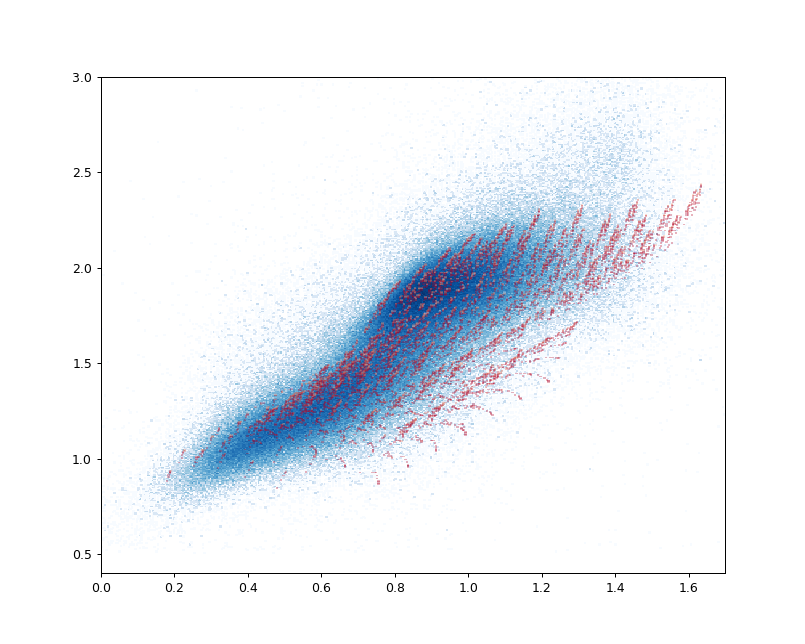

In [64]:
df = df_noneb
cmap = mpl.cm.Blues
cmap1 = mpl.cm.coolwarm_r
bins = 400

cond = df['tau_old'] <= 0.7

plt.hist2d(surv_gr, surv_ug, cmap=cmap, bins=bins, norm=mpl.colors.LogNorm())
plt.hist2d(df['g-r'].loc[cond].values,df['u-g'].loc[cond].values, bins=bins, cmap=cmap1, cmin=1, alpha=0.3)
plt.xlim(0, 1.7)
plt.ylim(.4,3)
plt.show()

<IPython.core.display.Javascript object>


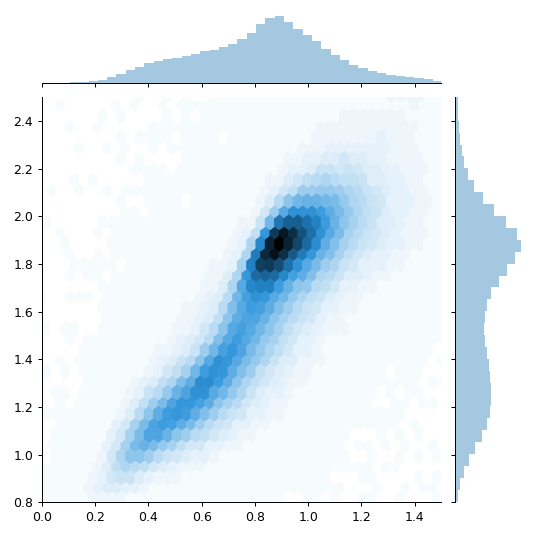

<IPython.core.display.Javascript object>


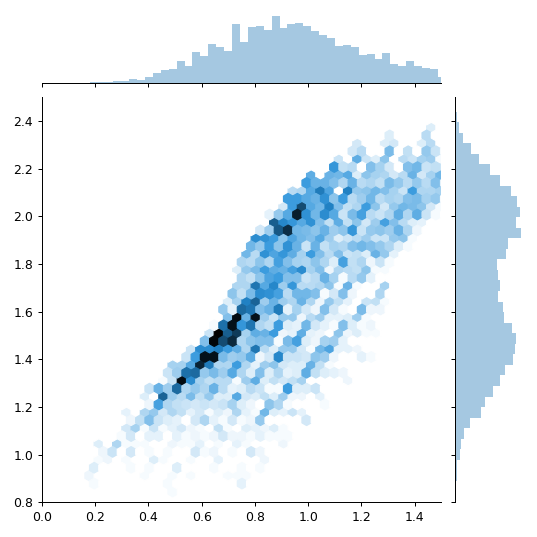

In [73]:
xlim = (0, 1.5)
ylim = (0.8, 2.5)

cond = df['tau_old'] < 0.7

sns.jointplot(surv_gr, surv_ug, kind="hex", bins=50, xlim=xlim, ylim=ylim)
sns.jointplot(df['g-r'].loc[cond].values,df['u-g'].loc[cond].values, kind="hex", bins=50, xlim=xlim, ylim=ylim)
plt.show()



In [66]:
df.shape

(39930, 17)

In [67]:
53421-df.shape[0]

13491